In [1]:
# Para no tener que hacer restart con cada actualizacion 

%load_ext autoreload
%autoreload 2



# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)
import pickle

from itertools import product, combinations

from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
import tqdm as tqdm
from scipy.stats import chi2_contingency
import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import Soporte_ajuste_modelos as f

# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek


from sklearn.model_selection import train_test_split,GridSearchCV
# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys




pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)

C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_preprocesado=pd.read_pickle("../../datos/datos3/datos_out_balanced.pkl").reset_index(drop=True)

## DECISION TREE

***Modelo A***

In [3]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 5, 6, 10, 15,20],'min_samples_split': [4,5,10,20,30, 40],'min_samples_leaf': [1, 2, 3, 4,5,6]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_tree3.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [4]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.93,0.93,0.93,0.93,0.85,0.98
test,0.78,0.78,0.78,0.78,0.56,0.79


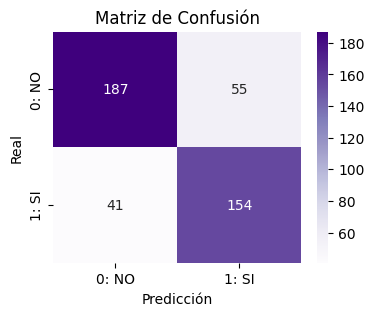

In [5]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

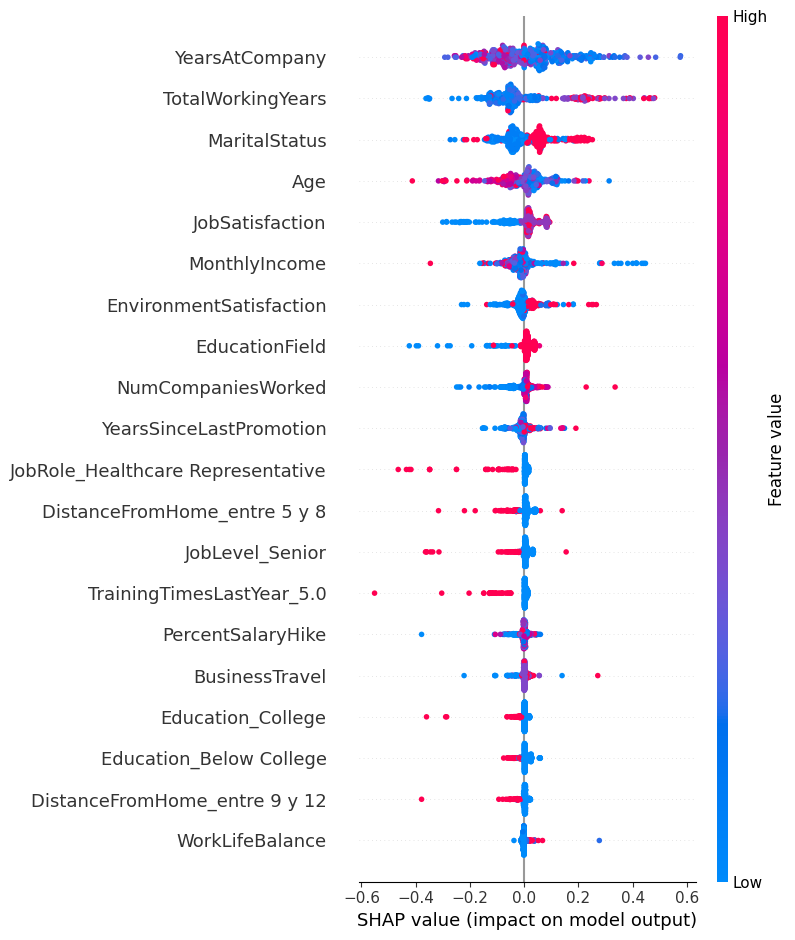

In [6]:
modelos_clasificacion.plot_shap_summary("tree")

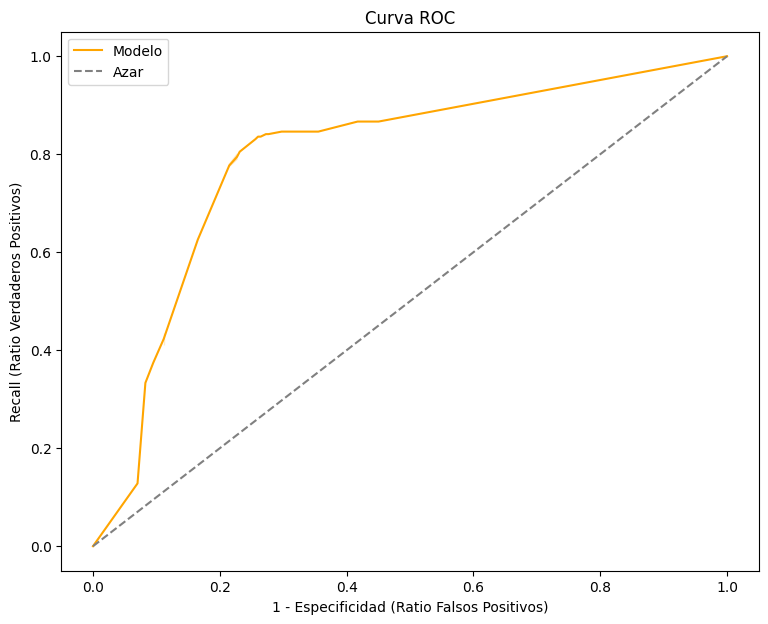

In [7]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

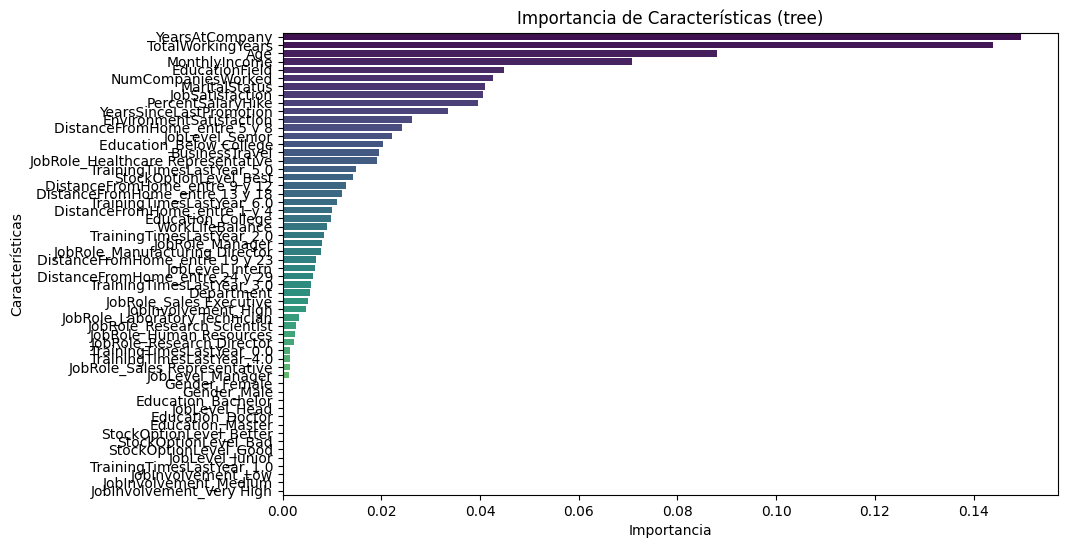

In [8]:
modelos_clasificacion.importancia_predictores("tree")

#### CON 0.7

***Modelo A.7***

In [9]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 5, 6, 10, 15,20],'min_samples_split': [4,5,10,20,30, 40],'min_samples_leaf': [1, 2, 3, 4,5,6]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_tree3.0.7.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=20, min_samples_split=5, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [10]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.98,0.98,0.98,0.98,0.97,1.00
test,0.79,0.79,0.79,0.79,0.58,0.80


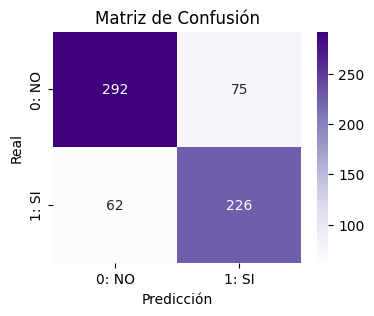

In [11]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

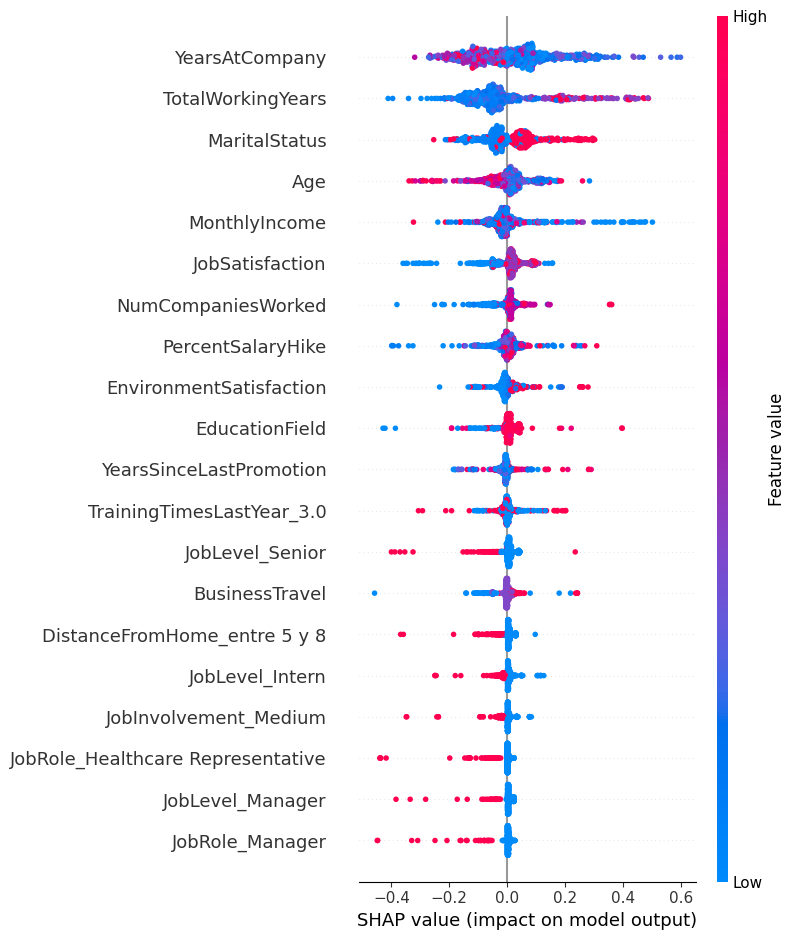

In [12]:
modelos_clasificacion.plot_shap_summary("tree")

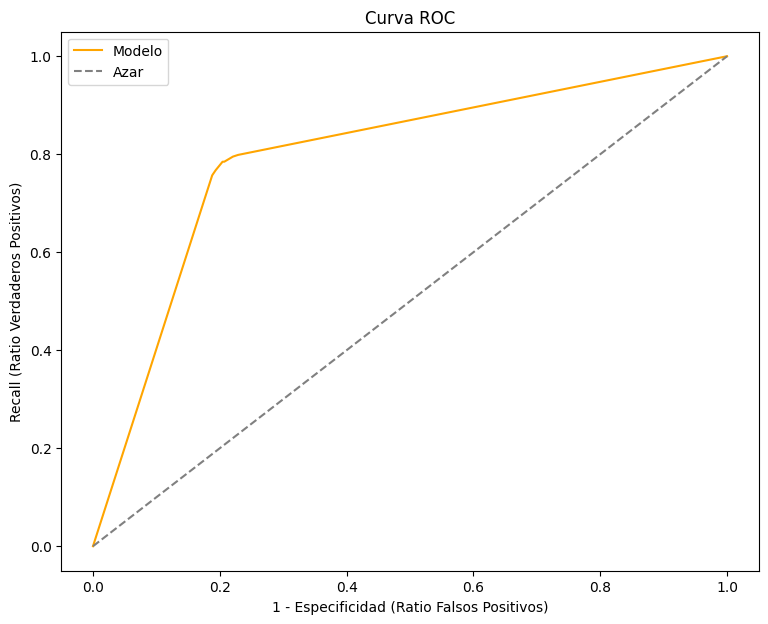

In [13]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

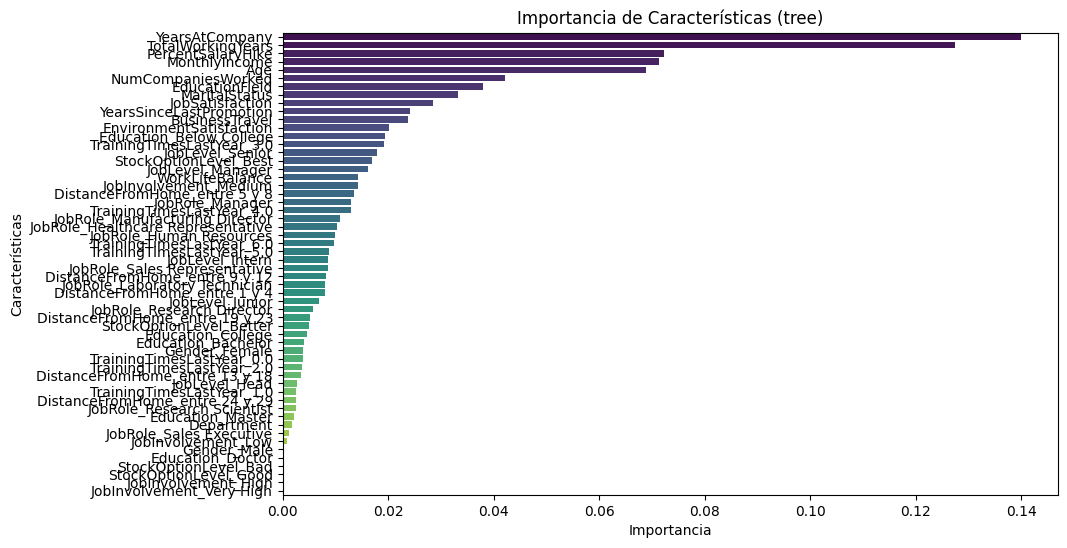

In [14]:
modelos_clasificacion.importancia_predictores("tree")

### TOCANDO PARAMETROS

## DECISION TREE

***Modelo B***

In [15]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 15,17,20,30,40],'min_samples_split': [4,5,10,20,30, 40],'min_samples_leaf': [4,5,6,10,20]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_tree3prueba.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=17, min_samples_leaf=5, min_samples_split=4,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [16]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.91,0.91,0.91,0.91,0.82,0.98
test,0.78,0.78,0.78,0.78,0.54,0.81


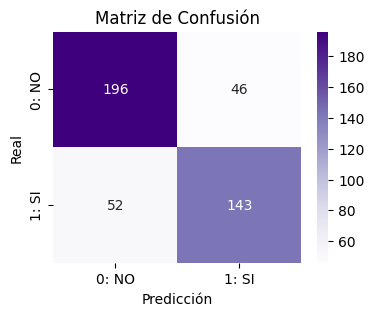

In [17]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

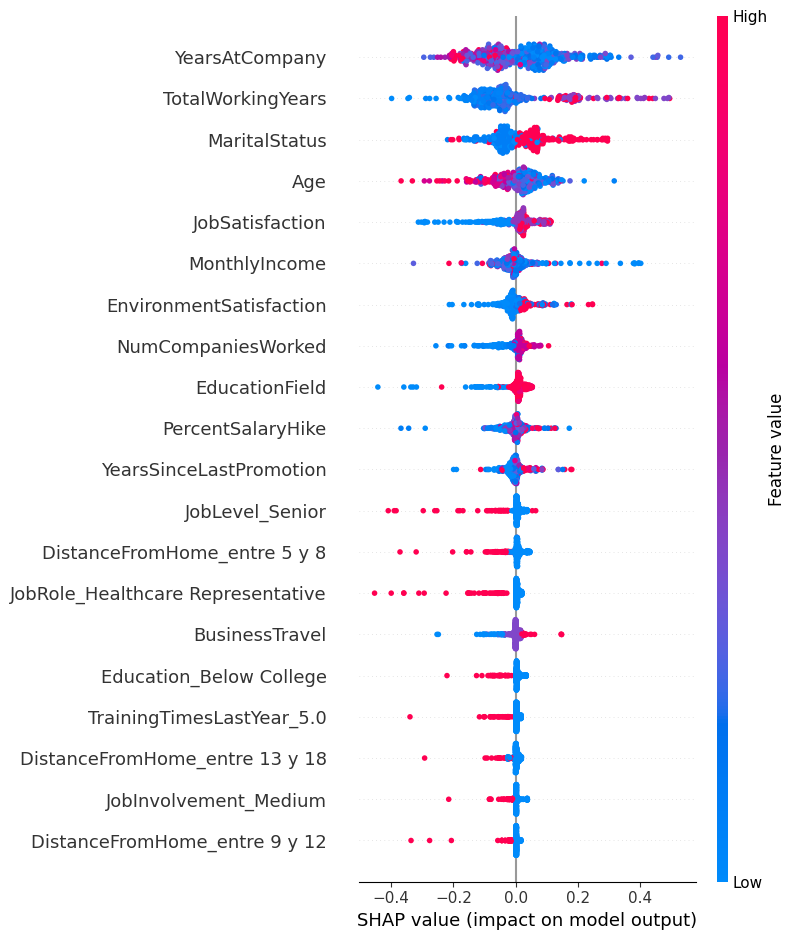

In [18]:
modelos_clasificacion.plot_shap_summary("tree")

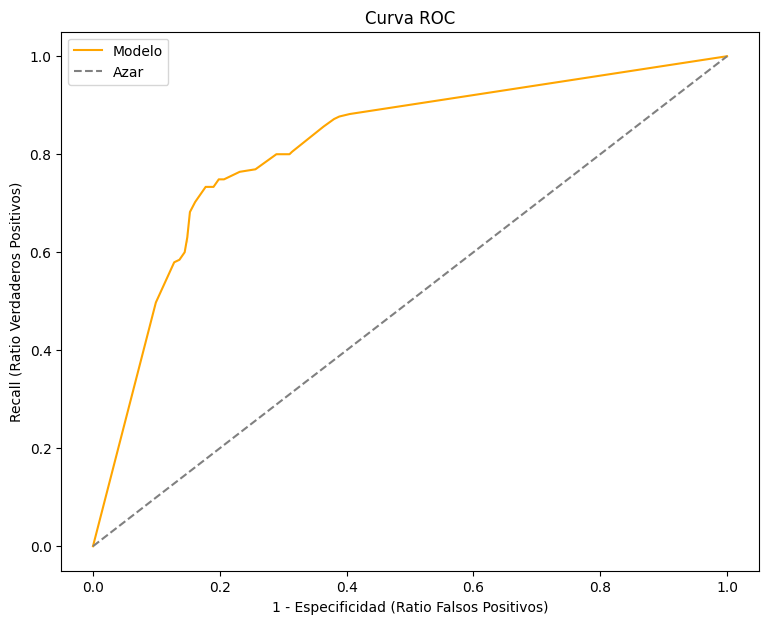

In [19]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

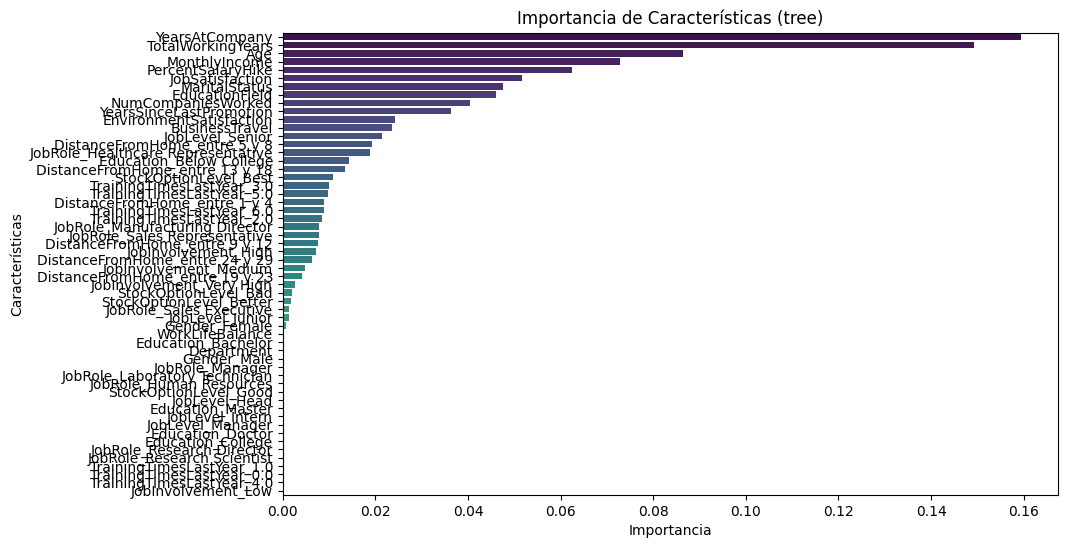

In [20]:
modelos_clasificacion.importancia_predictores("tree")

#### CON 0.7

***Modelo B.7***

In [48]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 15,17,20,30,40],'min_samples_split': [4,5,10,20,30, 40],'min_samples_leaf': [4,5,6,10,20]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3",nombre_modelo_guardar="modelo_tree3.B.7prueba.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=40,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [49]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.85,0.85,0.85,0.85,0.69,0.93
test,0.79,0.79,0.79,0.79,0.57,0.85


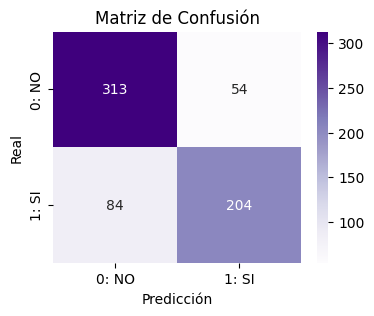

In [50]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

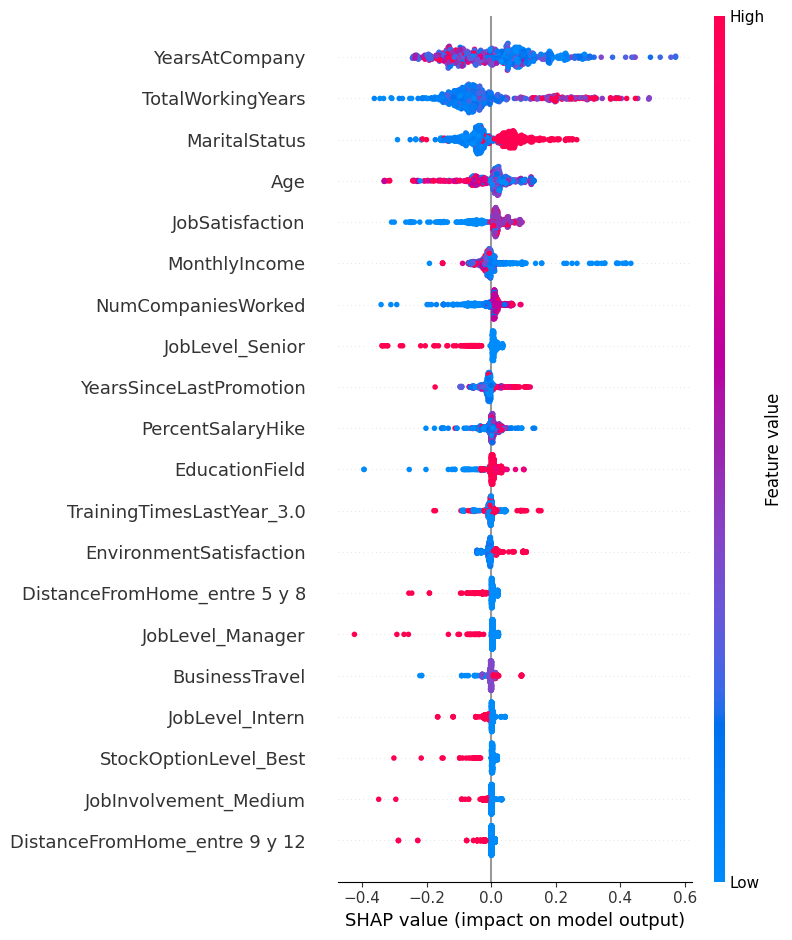

In [51]:
modelos_clasificacion.plot_shap_summary("tree")

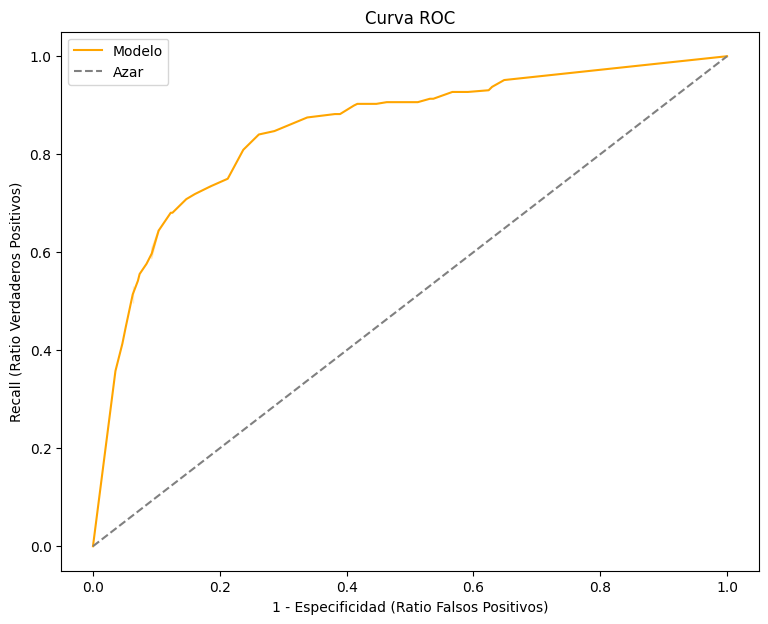

In [52]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

### TOCANDO PARAMETROS2

## DECISION TREE

***Modelo C***

In [26]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 13,15,17,20,30,40],'min_samples_split': [4,5,7,10,20,30, 40],'min_samples_leaf': [3,4,5,6,10,20]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_tree3prueba2.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=4,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [27]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.93,0.93,0.93,0.93,0.86,0.98
test,0.78,0.78,0.78,0.78,0.55,0.81


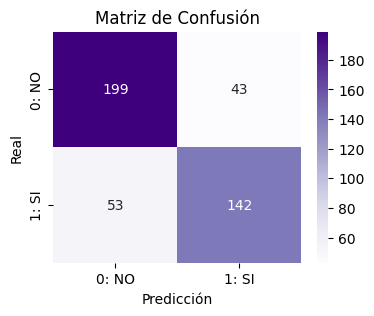

In [28]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

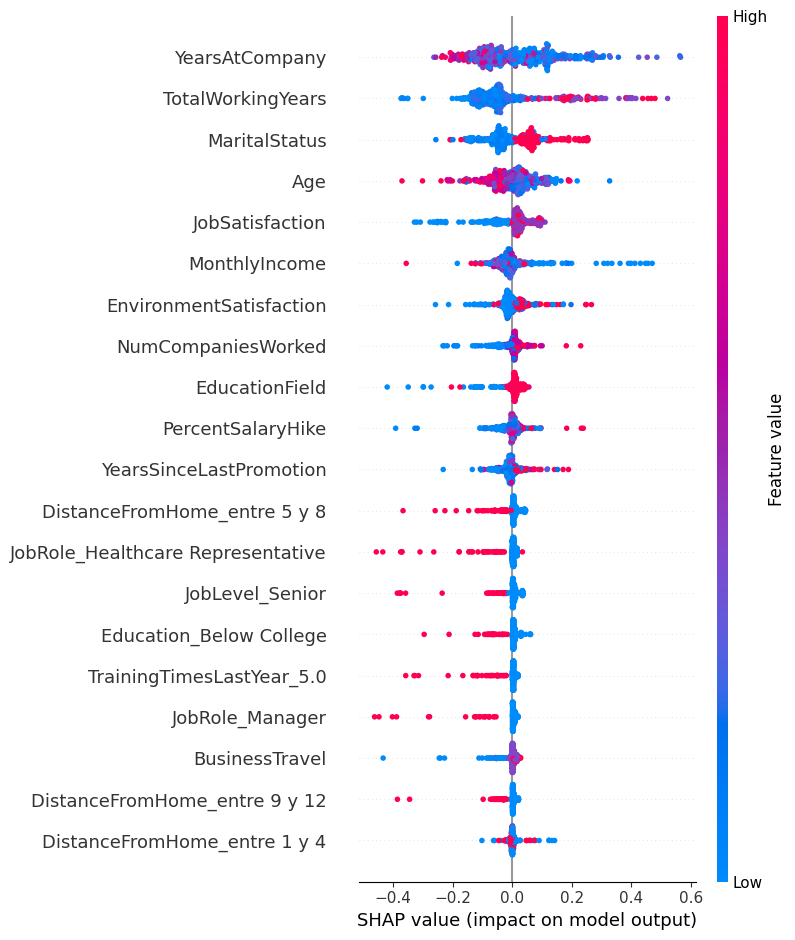

In [29]:
modelos_clasificacion.plot_shap_summary("tree")

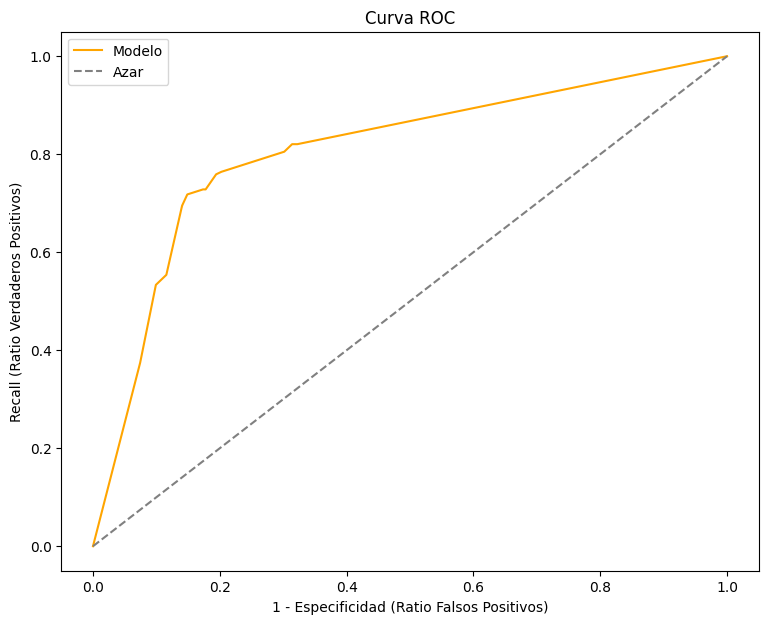

In [30]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

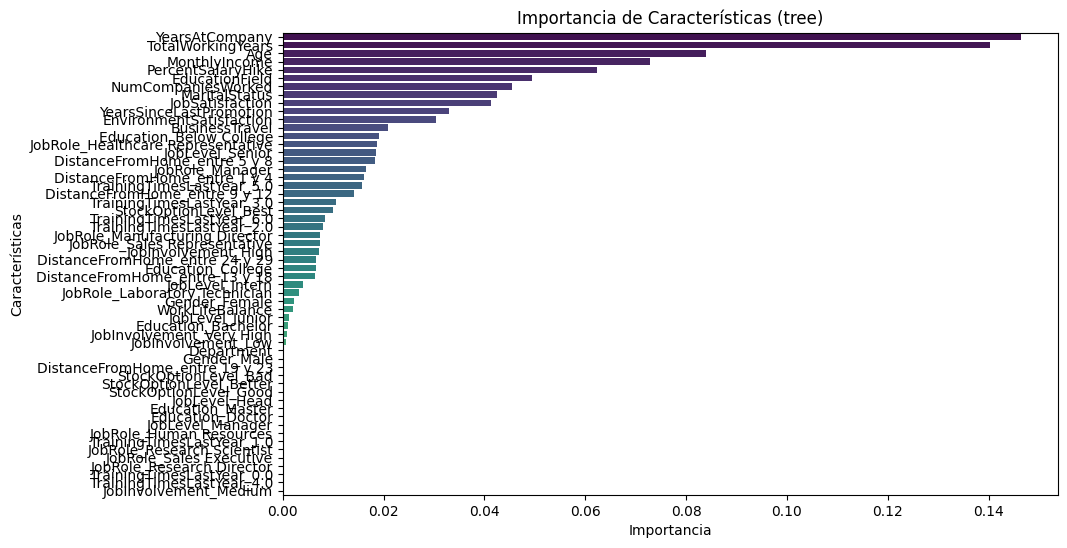

In [31]:
modelos_clasificacion.importancia_predictores("tree")

#### CON 0.7

***Modelo C.7***

In [32]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 13,15,17,20,30,40],'min_samples_split': [4,5,7,10,20,30, 40],'min_samples_leaf': [3,4,5,6,10,20]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_tree3.0.7prueba2.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=4,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [33]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.94,0.94,0.94,0.94,0.87,0.99
test,0.78,0.78,0.78,0.78,0.54,0.82


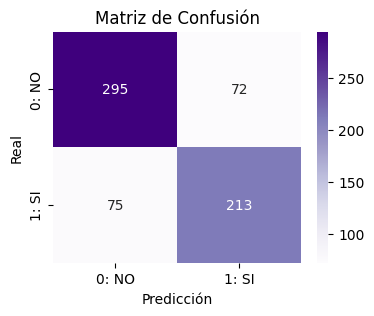

In [34]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

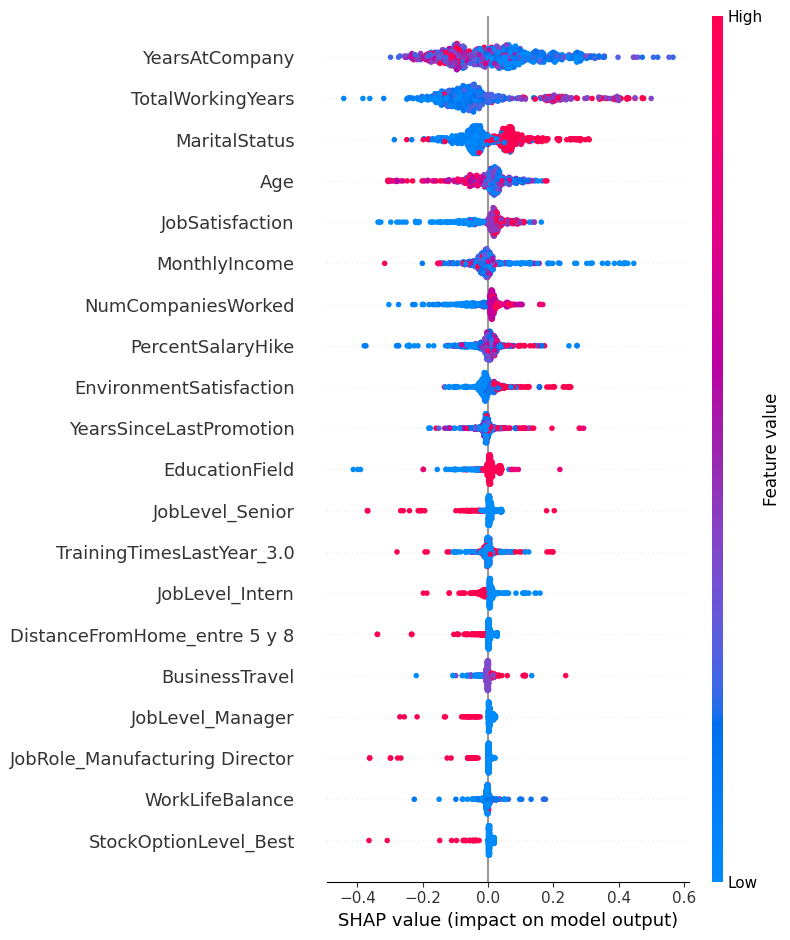

In [35]:
modelos_clasificacion.plot_shap_summary("tree")

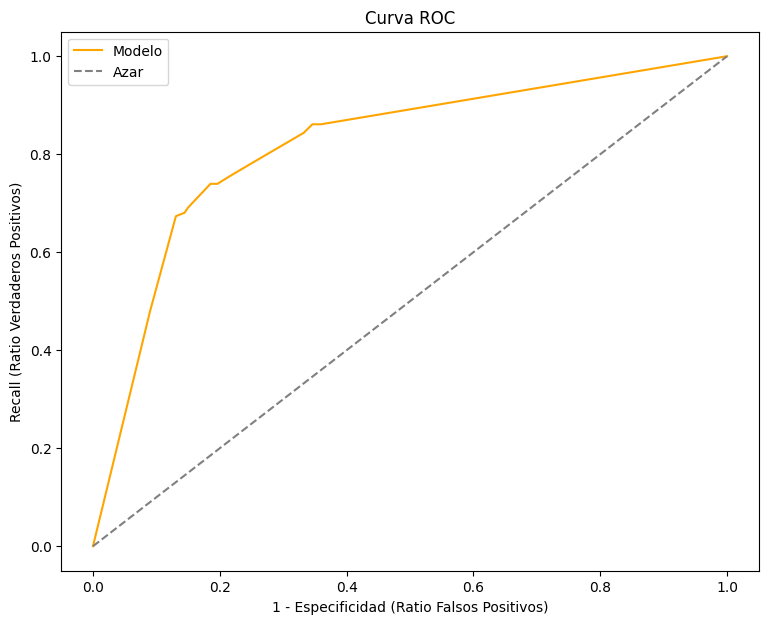

In [36]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

### TOCANDO PARAMETROS3

## DECISION TREE

***Modelo D***

In [37]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 13,15,17,20,30,40],'min_samples_split': [3,4,5,7,10,20,30, 40],'min_samples_leaf': [2,3,4,5,6,10,20,40]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_tree3prueba3.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [38]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.95,0.95,0.95,0.95,0.89,0.99
test,0.79,0.79,0.79,0.79,0.57,0.81


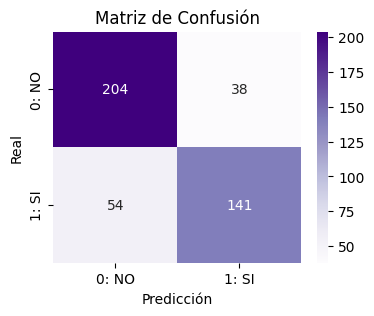

In [39]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

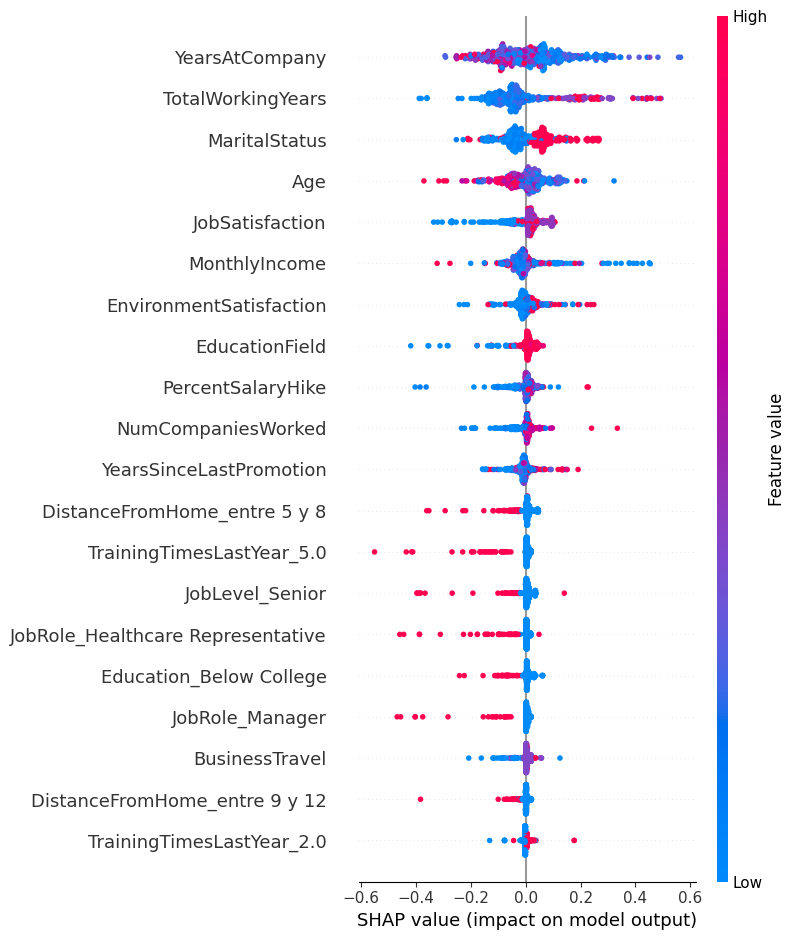

In [40]:
modelos_clasificacion.plot_shap_summary("tree")

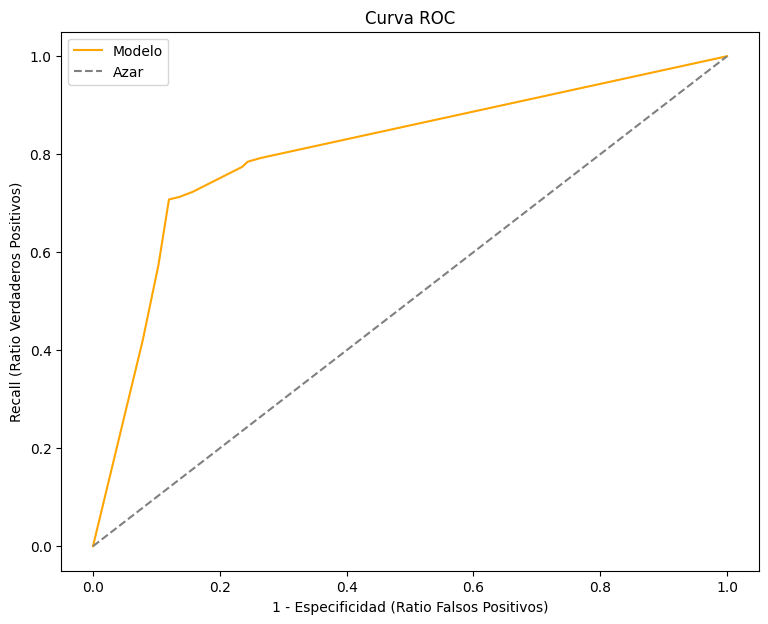

In [41]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

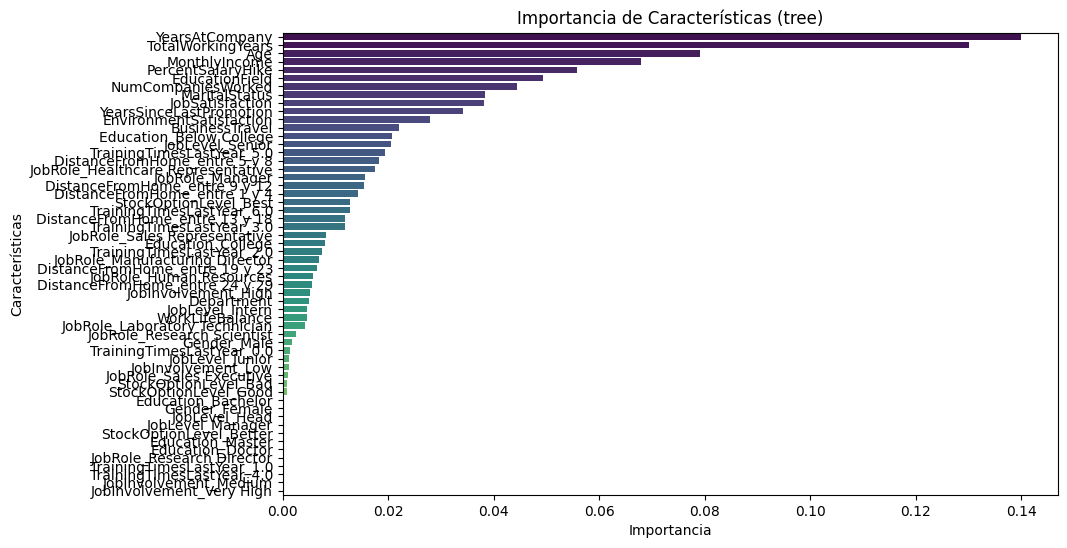

In [42]:
modelos_clasificacion.importancia_predictores("tree")

#### CON 0.7

***Modelo D.7***

In [43]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 13,15,17,20,30,40],'min_samples_split': [3,4,5,7,10,20,30, 40],'min_samples_leaf': [2,3,4,5,6,10,20,40]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_tree3.0.7prueba3.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=7,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [44]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.94,0.94,0.94,0.94,0.88,0.99
test,0.78,0.78,0.78,0.78,0.55,0.80


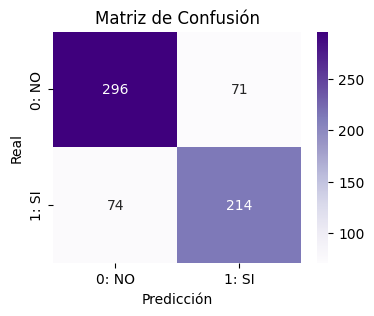

In [45]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

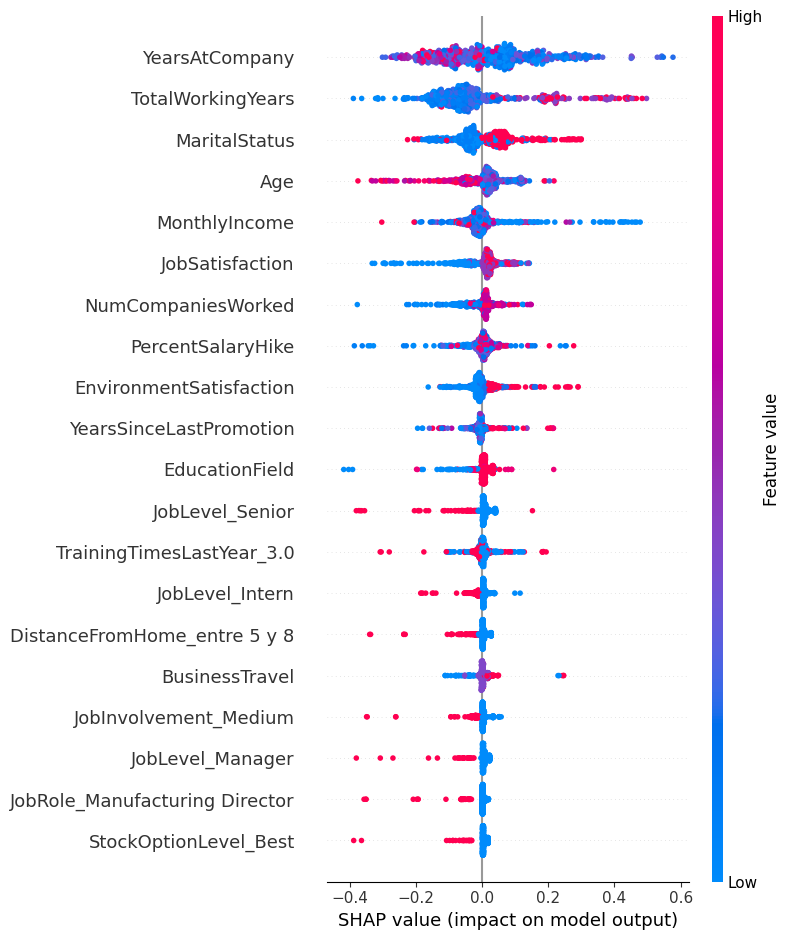

In [46]:
modelos_clasificacion.plot_shap_summary("tree")

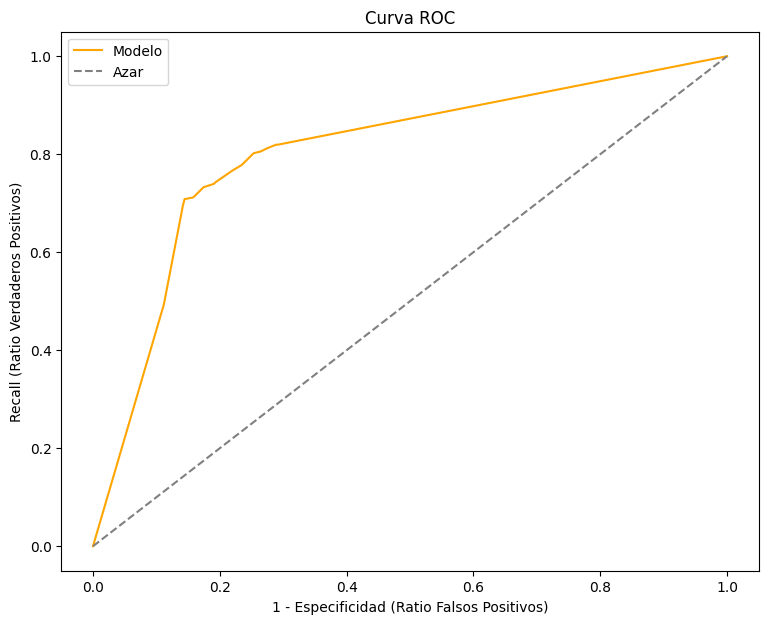

In [47]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

| Modelo     | Diff Accuracy | Diff Precision | Diff Recall | Diff F1  | Recall Test | Kappa Test | AUC Test |
|------------|---------------|----------------|-------------|----------|-------------|------------|----------|
| **A**      | 0.15          | 0.15           | 0.15        | 0.15     | 0.78        | 0.56       | 0.79     |
| **A.7**    | 0.19          | 0.19           | 0.19        | 0.19     | 0.79        | 0.58       | 0.80     |
| **B**      | 0.13          | 0.13           | 0.13        | 0.13     | 0.78        | 0.54       | 0.81     |
| **B.7**    | 0.06          | 0.06           | 0.06        | 0.06     | 0.79        | 0.57       | 0.85     |
| **C**      | 0.15          | 0.15           | 0.15        | 0.15     | 0.78        | 0.55       | 0.81     |
| **C.7**    | 0.16          | 0.16           | 0.16        | 0.16     | 0.78        | 0.54       | 0.82     |
| **D**      | 0.16          | 0.16           | 0.16        | 0.16     | 0.79        | 0.57       | 0.81     |
| **D.7**    | 0.16          | 0.16           | 0.16        | 0.16     | 0.78        | 0.55       | 0.80     |


### Conclusion de mejor Decision tree:  

  

*Tras observar todas las métricas de los modelos me cuestiono si usar el modelo A.7 o el modelo B.7*       
  
**Primera opción (equilibrio general): Modelo B.7**  

Tiene menor overfitting, Recall alto en test y unas métricas equilibradas.
Y aunque sacrifica un poco en Kappa, sigue siendo robusto teniendo en cuenta el resto.

- Me preocupa su matriz de confusión porque hay más falsos negativos que falsos positivos.

**Segunda opción: Modelo A.7**  
Tiene bastante mayor overfitting, pero un Recall más alto en test y unas métricas equilibradas.

- Su matriz de confusión me gusta más porque es mejor (porque hay menos falsos negativos que falsos positivos).
Por ello, dado que el modelo A.7, tiene  mayores niveles de overfitting a pesar de una matriz de confusión que refleja un mejor balance entre falsos positivos y negativos. Su capacidad predictiv es bastante peor por ello aunque priorice el error que queremos, prefiero tener un modelo que prediga mejor (porq hay que tener en cuenta que cuanto más general mejor, porque el modelo A.7 igual a categorizado muy bien aqui los errores etc pero cuando se usa con otros datos dado que no es tan general, puede ser un arma de doble filo)

#### ***Bajo mi criterio, prefiero el modelo B.7***  
